# Welcome to the project of "Exploratory Data Analysis" on Insurance Dataset and Cost.

In this project, learn practically how to create and apply graphical techniques in exploratory data analysis (EDA).

We will go through 5 tasks to implement our project:

Task 1: Definining Exploratory Data Analysis with an overview of the whole project (This first recorded non-technical task isn't included in the Jupyter notebook).

Task 2: Importing libraries and Exploring the Dataset.

Task 3: Checking missing values and Outliers.

Task 4: Creating visual methods to analyze the data.

Task 5: Analyzing trends, patterns, and relationships in the Data.

# Task 2: Importing libraries and Exploring the Dataset

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns #statistical plot in python
import statsmodels.api as sm # Python module for the estimation of many different statistical models
import scipy.stats as stats # Solve scientific and mathematical problems
from sklearn.preprocessing import LabelEncoder
import copy
sns.set() #setting the default seaborn style for our plots

In [4]:
# Loading and Read the Dataset
insurance_df = pd.read_csv("insurance-data.csv")

In [5]:
#Display the first 10 examples in the dataset, to view column name, data inside dataframe

insurance_df.head(10) 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [6]:
#Info about the data shape of data, type of individual columns

insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Expected output:

    The data should consist of 1338 instances with 7 attributes. 2 integer type, 2 float type and 3 object type (Strings in the column)

# Task 3: Checking missing values and Outliers

In [7]:
# Check for the null values 
# Using Pandas isna to Detect missing values
insurance_df.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


Expected Output:
    
    There shouldn't be any missing values

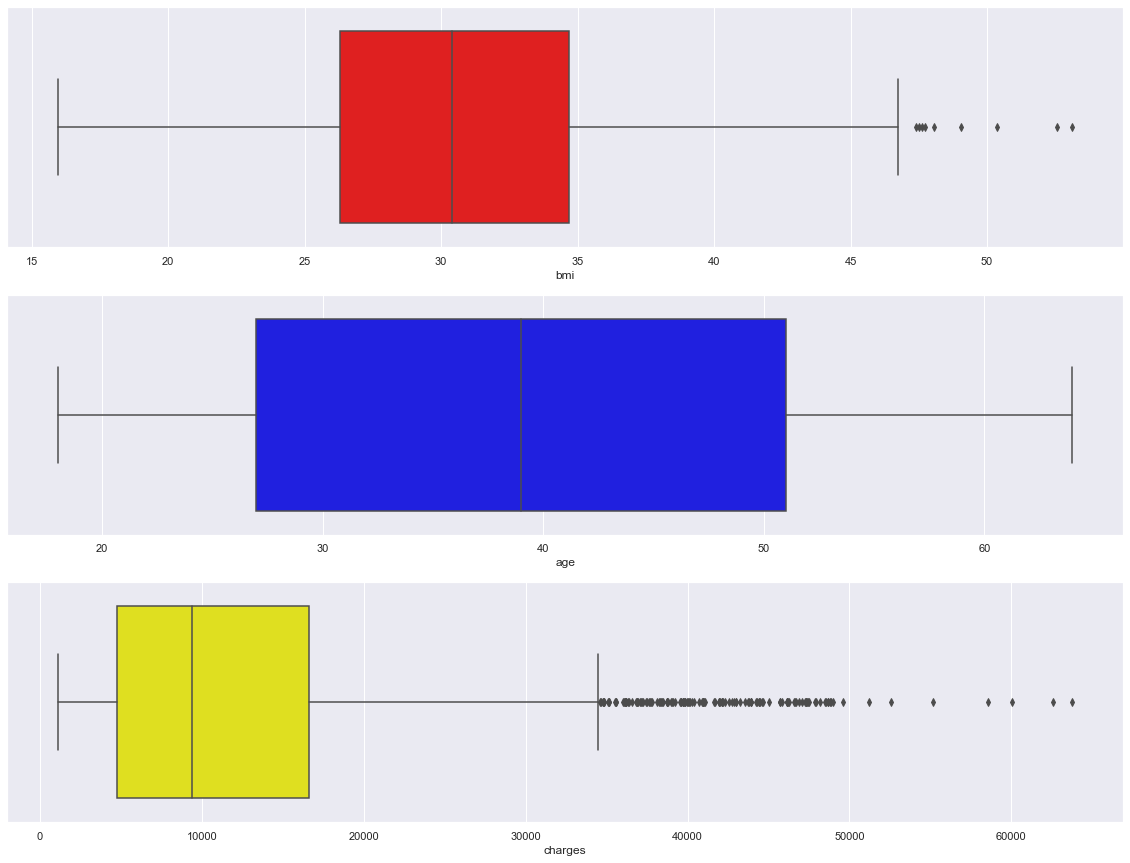

In [8]:
# Checking for the outliers
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= insurance_df.bmi, color='red')

plt.subplot(3,1,2)
sns.boxplot(x= insurance_df.age, color='blue')

plt.subplot(3,1,3)
sns.boxplot(x= insurance_df.charges, color='yellow')

plt.show()

Output should include this Analysis:

- bmi has a few extreme values.

- charges as it is highly skewed, there are quiet a lot of extreme values.

In [9]:
# a brief summary for the dataset

insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Output should include this Analysis:

- All the statistics seem reasonable.

- Age column: data looks representative of the true age distribution of the adult population with (39) mean.

- Children Column: Few people have more than 2 children (75% of the people have 2 or less children).

- The claimed amount is higly skewed as most people would require basic medi-care and only few suffer from diseases which cost more to get rid of.

# Task 4: Creating visual methods to analyze the data.

Create Histograms for viewing distributions of bmi, age and charges for Hypothesis testing and other statistical tests. 

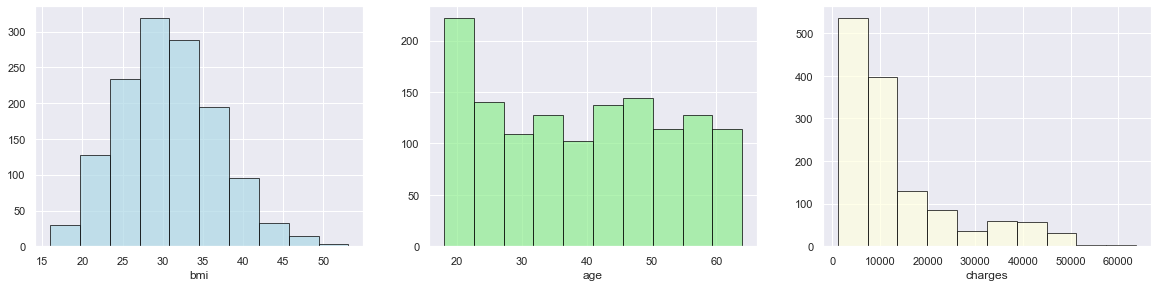

In [10]:
# Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(insurance_df.bmi, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(insurance_df.age, color='lightgreen', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(insurance_df.charges, color='lightyellow', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

plt.show()

Output should include this Analysis:

- bmi looks normally distributed.

- Age looks uniformly distributed.

- As seen in the previous step, charges are highly skewed.

In [11]:
# showing the skewness of variables
Skewness = Skewness = pd.DataFrame({'Skewness' : [stats.skew(insurance_df.bmi),stats.skew(insurance_df.age),stats.skew(insurance_df.charges)]}, 
                                   index=['bmi', 'age', 'charges'])

# We Will Measure the skeweness of the required columns
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


Output should include this Analysis:

- Skewness of bmi is very low as seen in the previous step

- age is uniformly distributed and thus not skewed

- charges are highly skewed

In [12]:
# To check which data is in Categorical and which data in numeric for below plot
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


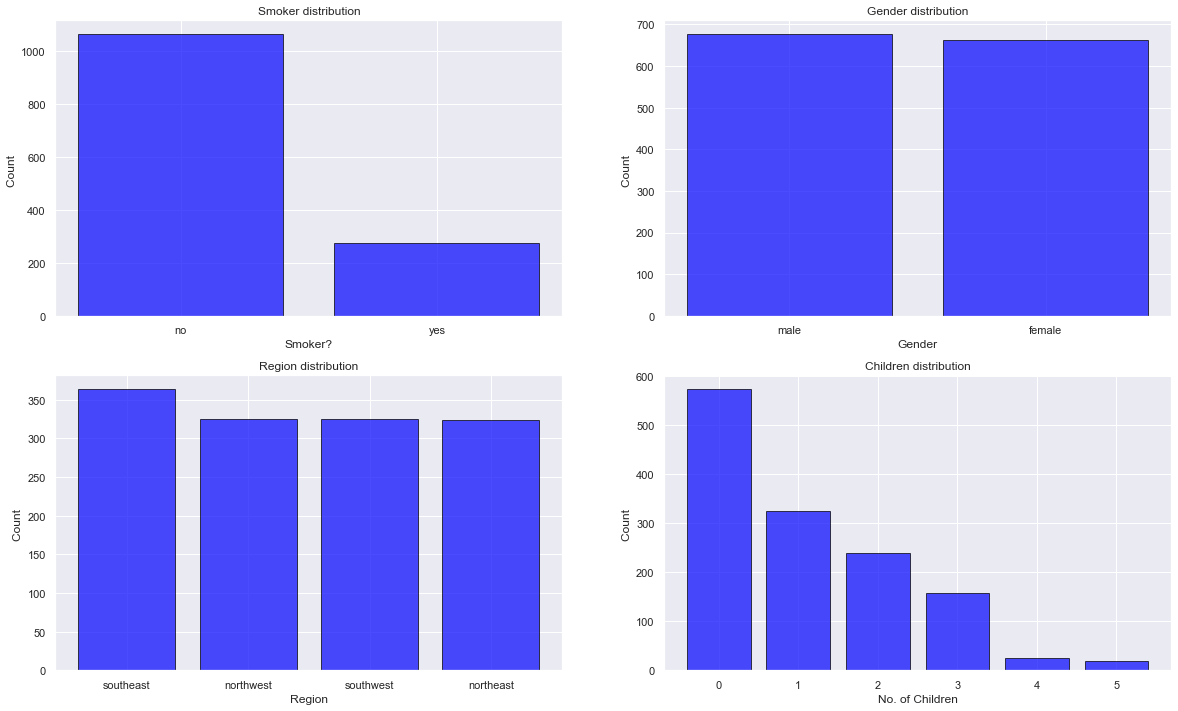

In [13]:
# visualizing data to make analysis

plt.figure(figsize=(20,25))

# Plot for Smoker in Categorical form as Yes or No
x = insurance_df.smoker.value_counts().index    #Values for x-axis
y = [insurance_df['smoker'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'blue',edgecolor = 'black',alpha = 0.7)  # plot a bar chart
plt.xlabel('Smoker?')
plt.ylabel('Count ')
plt.title('Smoker distribution')


#Plot for Gender in Categorical form as Male or Female
x1 = insurance_df.sex.value_counts().index    #Values for x-axis
y1 = [insurance_df['sex'].value_counts()[j] for j in x1]   # Count of each class on y-axis

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'blue',edgecolor = 'black',alpha = 0.7)  # plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count ')
plt.title('Gender distribution')


# Plot for Region count
x2 = insurance_df.region.value_counts().index    #Values for x-axis
y2 = [insurance_df['region'].value_counts()[k] for k in x2]   # Count of each class on y-axis

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'blue',edgecolor = 'black',alpha = 0.7)  # plot a bar chart
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title('Region distribution')



# Plot for Children count
x3 = insurance_df.children.value_counts().index    #Values for x-axis
y3 = [insurance_df['children'].value_counts()[l] for l in x3]   # Count of each class on y-axis

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = 'blue',edgecolor = 'black',alpha = 0.7)  # plot a bar chart
plt.xlabel('No. of Children')
plt.ylabel('Count ')
plt.title('Children distribution')

plt.show()

Output should include this Analysis:

- There are lot more non-smokers than smokers.

- Instances are distributed evenly accross all regions.

- Gender is also distributed evenly.

- Most instances have less than 3 children and very few have 4 or 5 children.

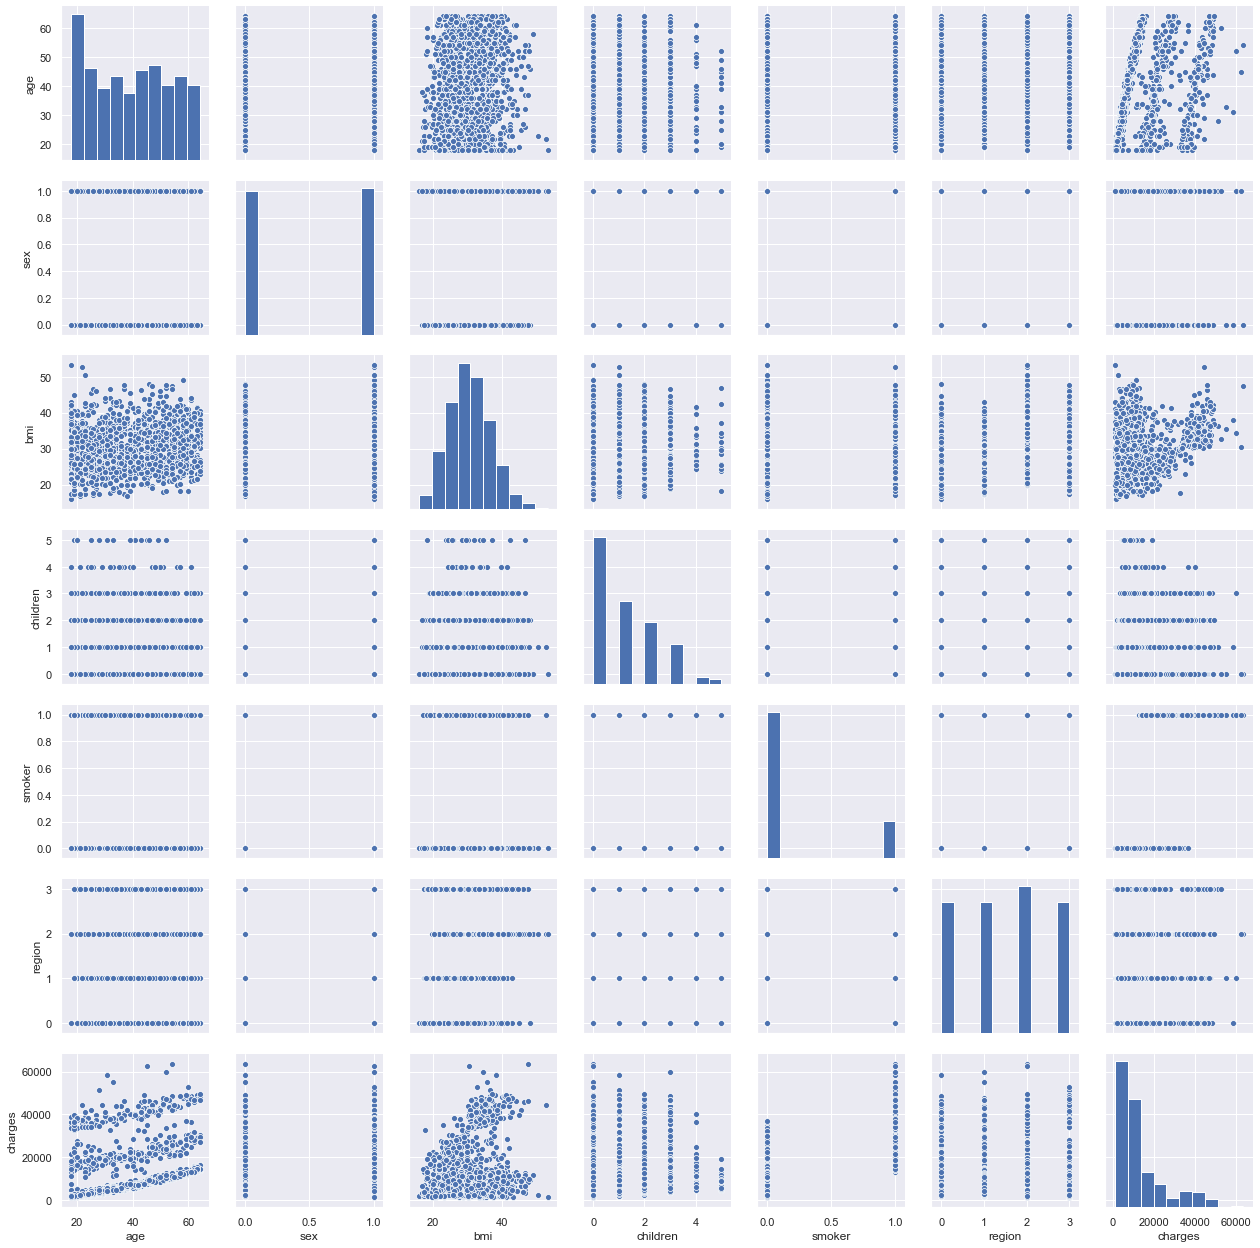

In [14]:
# Label encoding the variables before doing a pairplot because pairplot ignores strings

insurance_df_encoded = copy.deepcopy(insurance_df)
### Your Code Here
insurance_df_encoded.loc[:,['sex', 'smoker', 'region']] = insurance_df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(insurance_df_encoded)  # pairplot
plt.show()

Output should include this Analysis:

- There is an obvious correlation between 'charges' and 'smoker'

- Looks like smokers claimed more money than non-smokers

- There's an interesting pattern between 'age' and 'charges'. Notice that older people are charged more than the younger ones

# Task 5: Analyzing trends, patterns, and relationships in the Data.

In [15]:
# Do charges of people who smoke differ significantly from the people who don't?


print("Do charges of people who smoke differ significantly from the people who don't?")
insurance_df.smoker.value_counts()

Do charges of people who smoke differ significantly from the people who don't?


no     1064
yes     274
Name: smoker, dtype: int64

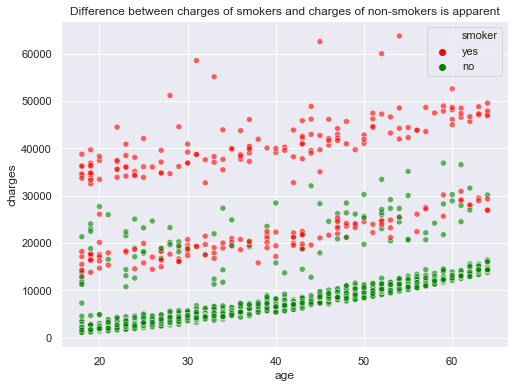

In [16]:
# Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages

plt.figure(figsize=(8,6))
sns.scatterplot(insurance_df.age, insurance_df.charges,hue=insurance_df.smoker,palette= ['red','green'] ,alpha=0.6)
plt.title("Difference between charges of smokers and charges of non-smokers is apparent")
plt.show()

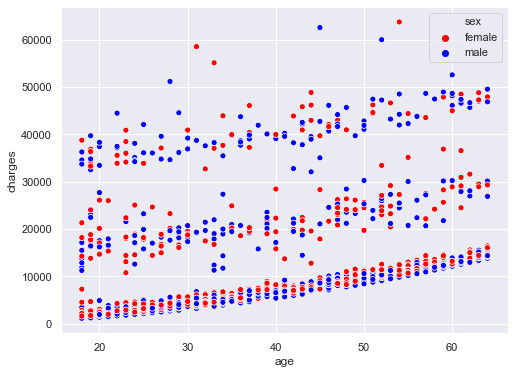

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(insurance_df.age, insurance_df.charges,hue=insurance_df.sex,palette= ['red','blue'] )

There is no apparent relation between gender and charges

# Hypothesis testing :
A statistical hypothesis that is testable on the basis of observed data modeled as the realised values taken by a collection of random variables. Statistical analysts test a hypothesis by measuring and examining a random sample of the population being analyzed. Hypothesis tests based on statistical significance are another way of expressing confidence intervals (more precisely, confidence sets). In other words, every hypothesis test based on significance can be obtained via a confidence interval, and every confidence interval can be obtained via a hypothesis test based on significance. 

### Apply T-test for Hypothesis testing:
A t-test is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another, if there is a significant difference between the means of two groups, which may be related in certain features. Compares means of two populations applies when standard deviation is not known and sample size is small.

Assumptions for t-test:

1. Bivariate independent variable (A, B groups)
2. Continuous dependent variable
3. Each observation of the dependent variable is independent of the other observations of the dependent variable (its probability distribution isn't affected by their values). Exception: For the paired t-test, we only require that the pair-differences (Ai - Bi) be independent from each other (across i).
4. Dependent variable has a normal distribution, with the same variance, σ2, in each group (as though the distribution for group A were merely shifted over to become the distribution for group B, without changing shape): Bell shape curve

In [18]:
# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

x = np.array(insurance_df[insurance_df.smoker =='yes'].charges)
y = np.array(insurance_df[insurance_df.smoker =='no'].charges)

t, p_value  = stats.ttest_ind(x,y, axis = 0)  # Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842177219e-283) < 0.05


Thus, Smokers seem to claim significantly more money than non-smokers

In [19]:
#Does bmi of males differ significantly from that of females?

print ("Does bmi of males differ significantly from that of females?")
insurance_df.sex.value_counts()   #Checking the distribution of males and females

Does bmi of males differ significantly from that of females?


male      676
female    662
Name: sex, dtype: int64

In [24]:
# T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis

x = np.array(insurance_df[insurance_df.sex =='male'].bmi)
y = np.array(insurance_df[insurance_df.sex =='female'].bmi)

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


bmi of both the genders are identical


### Applying Chi- square test:
A chi-square (χ2) statistic is a test that measures how a model compares to actual observed data. The data used in calculating a chi-square statistic must be random, raw, mutually exclusive, drawn from independent variables, and drawn from a large enough sample. A Chi-Square test is a test of statistical significance for categorical variables. 

Chi-squared tests often refers to tests for which the distribution of the test statistic approaches the χ2 distribution asymptotically, meaning that the sampling distribution (if the null hypothesis is true) of the test statistic approximates a chi-squared distribution more and more closely as sample sizes increase.

Assumptions for chi-square (χ2) test:

1. Simple Random Sample: The χ2 assumes that the data for the study is obtained through random selection, i.e. they are randomly picked from the population
2. Sample size: A sample with a sufficiently large size is assumed. If a chi squared test is conducted on a sample with a smaller size, then the chi squared test will yield an inaccurate inference. The researcher, by using chi squared test on small samples, might end up committing a Type II error.
3. Independent: The categories are mutually exclusive i.e. each subject fits in only one category. For e.g.- from our below example – Gender category and other Smokers.
3. Categorical Data: The data should be in the form of frequencies or counts of a particular category and not in percentages. Two variables should be measured at an ordinal or nominal level. That is they must be categorical data.
4. The data should not consist of paired samples or groups or we can say the observations should be independent of each other, When more than 20% of the expected frequencies have a value of less than 5 then Chi-square cannot be used.  To tackle this problem: Either one should combine the categories only if it is relevant or obtain more data.

In [21]:
#Is the proportion of smokers significantly different in different genders?


# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(insurance_df['sex'],insurance_df['smoker'])

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


Proportion of smokers in males is significantly different from that of the females



In [22]:
# Chi_square test to check if smoking habits are different for people of different regions
Ho = "Region has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Region has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(insurance_df['smoker'],insurance_df['region'])

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Region has no effect on smoking habits as the p_value (0.062) > 0.05


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


* Smoking habbits of people of different regions are similar


## Applying F-test :

F-test is a statistical test which helps us in finding whether two population sets which have a normal distribution of their data points have the same standard deviation or variances. But the first and foremost thing to perform F-test is that the data sets should have a normal distribution. Determines the equality of the variances of the two normal populations. Compares variances of two populations.

Assumptions for F test:
1. The population is normally distributed.
2. Samples have been randomly drawn.
3. Observations are independent.
4. Null hypothesis(Ho) may be one sided or two sided.


In [23]:
# Is the distribution of bmi across women with no children, one child and two children, the same ?
# Test to see if the distributions of bmi values for females having different number of children, are significantly different

Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_df = copy.deepcopy(insurance_df[insurance_df['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05


## Result Summary:

1. Charges of smoker and non-smoker are not the same as the p_value (8.271435842177219e-283) < 0.05 and 
   Smokers seem to claim significantly more money than non-smokers
2. Gender has no effect on bmi as the p_value (0.09) > 0.05, BMI of both gender are identical.
3. Gender has an effect on smoking habits as the p_value (0.007) < 0.05 and 
   Proportion of smokers in males is significantly different from that of the females.
4. Region has no effect on smoking habits as the p_value (0.062) > 0.05
5. No. of children has no effect on bmi as the p_value (0.716) > 0.05

Refernces:
1. https://www.scribbr.com/statistics/t-test/
2. http://www.csic.cornell.edu/Elrod/t-test/t-test-assumptions.html
3. https://www.analyticsvidhya.com/blog/2019/11/what-is-chi-square-test-how-it-works/
4. https://www.educba.com/f-test-formula/